In [1]:
import numpy as np          # type: ignore
import pandas as pd         # type: ignore

<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
loc vs iloc
</div>

📌 **`loc` (Label-based selection):**  
- Selects rows and columns by **labels** (index names & column names).  
- Includes the ending index when using a range.  
- Supports slicing, lists, and conditions.  


📌 **`iloc` (Integer-location based selection):**  
- Selects rows and columns by **integer positions** (starting from `0`).  
- Excludes the ending index when using a range.  
- Supports slicing, lists, and integer-based indexing.  

📝 **Example:**  
```python
import pandas as pd

df = pd.DataFrame({
    'A': [10, 20, 30],
    'B': [40, 50, 60]
}, index=['x', 'y', 'z'])

# Using loc (label-based)
print(df.loc['x', 'A'])  # Output: 10

# Using iloc (integer position-based)
print(df.iloc[0, 0])  # Output: 10
```
🚀 **Tip:** Use `loc` for **labels** and `iloc` for **positions**!
- **loc[ row ]**
- **iloc[ index of value for row ]**

⚠️ **loc[ col ] ➡️ error**

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [2]:
col   = ['year', 'state', 'pop', 'debt']
row   = ['one','two','three','four','five','six']
data1 = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2002, 2003],
        'pop'  : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data1, columns=col ,index=row)
frame

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [3]:
print(frame.loc['three'])
print("------")
print(frame.loc['three']['pop'])

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object
------
3.6


In [4]:
print(frame.iloc[2])
print("------")
print(frame.iloc[2]['pop'])

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object
------
3.6


In [5]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
        index=['Ohio', 'Colorado', 'Utah', 'New York'],
        columns=['one', 'two', 'three', 'four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [6]:
print(data["one"])
print("------")
print(data.loc['Utah'][["two","three"]])
print("------")
print(data.iloc[2, [1, 2]])
print("------")
print(data.iloc[2][["two","three"]])

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int32
------
two       9
three    10
Name: Utah, dtype: int32
------
two       9
three    10
Name: Utah, dtype: int32
------
two       9
three    10
Name: Utah, dtype: int32


In [7]:
print(data.iloc[[1, 2], [3, 0, 1]])

          four  one  two
Colorado     7    4    5
Utah        11    8    9


In [8]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


> ### 📌 **🚀 Quick Rule:**  
- `loc` **(labels)** → Includes the last index.  
- `iloc` **(integers)** → Excludes the last index.

In [9]:
print(data.loc[ :'Colorado', 'two'])   
print("------")
print(data.iloc[:,:3][data["three"]> 5])

Ohio        1
Colorado    5
Name: two, dtype: int32
------
          one  two  three
Colorado    4    5      6
Utah        8    9     10
New York   12   13     14


<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
at vs iat , _get_value vs _set_value
</div>

🔹 **`at` → Label-based, Faster for Single Values**  
- Used to access a **single** value by **row and column labels**.  
- More efficient than `loc` for retrieving a single element.  

```python
print(data.at['Colorado', 'two'])  # ✅ Uses labels
```

🔹 **`iat` → Integer-based, Optimized for Speed**  
- Used to access a **single** value by **row and column index positions**.  
- Faster than `iloc` for retrieving a single element.  

```python
print(data.iat[2, 1])  # ✅ Uses integer indices
```

📌 **🚀 Quick Rule:**  
### 📌 **Comparison Table: `at` vs `iat`**  

| Method  | Type            | Usage Syntax                           | Best For                          |  
|---------|----------------|----------------------------------------|-----------------------------------|  
| **`at`**  | Label-based     | `at[row_label, col_label]` → `_get_value(row_label, col_label)` | Fast single-value access using labels |  
| **`iat`** | Integer-based   | `iat[row_index, col_index]`         | Even faster single-value access using indices |  

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [10]:
print(data.at["Colorado","three"])
print("------")
print(data.iat[1,1])

6
------
5


In [11]:
print(data._get_value("Colorado","three"))

data._set_value("Utah","four",100)              # modify value
data

6


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,100
New York,12,13,14,15


In [12]:
print(data._set_value("Utah","four",200))     # None but it modify value
data

None


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,200
New York,12,13,14,15


<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
where vs query
</div>

| Method   | Usage Syntax                           | Best For                                      |  
|----------|----------------------------------------|-----------------------------------------------|  
| **`where`**  | `df.where(condition, do_it)` | Filtering data while keeping the original shape (non-matching rows filled with NaN) |  
| **`query`**  | `df.query("condition")` | More concise filtering using string-based expressions (returns only matching rows) |  

### ✅ **Global Equivalent Syntax for query:**  

```python
df.query("Column1 > Column2")  ≡  df[df["Column1"] > df["Column2"]]
```  

This works for any two numerical columns in a DataFrame. 🚀

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [13]:
df = pd.DataFrame(np.arange(10).reshape(5, 2), columns=['A', 'B'])
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [14]:
df.where(df%3==0, df+100 ,inplace=True)
df

,A,B
0,0,101
1,102,3
2,104,105
3,6,107
4,108,9


In [15]:
df= pd.DataFrame( { "Math":[80,90,67,80], 
                    "DS":[95, 70 ,88,50], 
                    "Physics":[55,90,80,70]}, index=[2030451,2030455,2030456,2030458])
df.index.name="ID"
df

,Math,DS,Physics
ID,,,
2030451,80,95,55
2030455,90,70,90
2030456,67,88,80
2030458,80,50,70


In [16]:
df.query("Math > Physics")     # = df[df["Math"] > df["Physics"]]

,Math,DS,Physics
ID,,,
2030451,80,95,55
2030458,80,50,70


In [17]:
df[df["Math"] > df["Physics"]]

,Math,DS,Physics
ID,,,
2030451,80,95,55
2030458,80,50,70


In [18]:
df

,Math,DS,Physics
ID,,,
2030451,80,95,55
2030455,90,70,90
2030456,67,88,80
2030458,80,50,70


In [19]:
df.where(df<85,"Exc",inplace=True)    # replacing
df

C:\Users\abdal\AppData\Local\Temp\ipykernel_2440\2022071392.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Exc' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.where(df<85,"Exc",inplace=True)    # replacing


,Math,DS,Physics
ID,,,
2030451,80,Exc,55
2030455,Exc,70,Exc
2030456,67,Exc,80
2030458,80,50,70


# 🔴 **Handling FutureWarning in `df.where()` Replacement**  

### ❌ **Problem:**
When replacing values in a DataFrame using `.where()`, Pandas raises a **FutureWarning** if the replacement value has an incompatible dtype with the DataFrame's existing dtype.  

#### **Example:**
```python
df.where(df < 85, "Exc", inplace=True)  # Replacing values greater than or equal to 85 with "Exc"
```
**⚠ Warning:**  
```
FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas.
Value 'Exc' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
```

---

## ✅ **Solutions**

### 🟢 **Solution 1: Convert the DataFrame to `object` dtype**  
If you want to allow mixed data types (numbers & strings), convert the DataFrame to `object` before using `.where()`:
```python
df = df.astype(object)  
df.where(df < 85, "Exc", inplace=True)  
```

---

### 🟢 **Solution 2: Use `numpy.where()` to preserve numeric values**
If you want to keep the DataFrame mostly numeric, use `numpy.where()` instead:
```python
import numpy as np
df = np.where(df < 85, df, "Exc")
```

**📌 Note:**  
Starting from **pandas 2.2.0**, this warning will become an **error** unless you explicitly handle data type compatibility! 🚀

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
merge
</div>

# 🔗 **Merging Two DataFrames** 🚀  

## ✅ **Focus on Column Values**  
When merging DataFrames, **only matching values across the specified columns** will be retained. This ensures that the result contains **common data** between both DataFrames.

### 🔍 **Intersection-Based Merge**  
To merge two DataFrames **based on common values** along a row:  
```python
pd.merge(df1, df2)  
```
This performs an **inner join** by default, keeping only the **matching values** across shared columns.

📌 **Example:**  
| df1  | A  | B  |  
|------|----|----|  
| 0    | X  | Y  |  
| 1    | A  | B  |  
| 2    | P  | Q  |  
___________
| df2  | A  | C  |  
|------|----|----|  
| 0    | X  | Z  |  
| 1    | A  | D  |  
| 2    | M  | N  |  
___________
🔗 **Merged DataFrame (`pd.merge(df1, df2)`)**  
| A  | B  | C  |  
|----|----|----|  
| X  | Y  | Z  |  
| A  | B  | D  |  
___________


✨ **Key Takeaway:**  
- **Keeps only rows with matching values in the common column(s).**  
- **Use `on=` to specify a merge column explicitly.**  
- **Use `how="left"`, `how="right"`, or `how="outer"` for different merging strategies.**  

🚀 **Merge Smart, Keep It Clean!**  

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [20]:
XYZ_web = { "Day":[1,2,3,4,5,6], 
            "Visitors":[1000, 700,6000,1000,400,350], 
            "Bounce_Rate":[20,20, 23,15,10,34]}
df = pd.DataFrame(XYZ_web)
df

,Day,Visitors,Bounce_Rate
0,1,1000,20
1,2,700,20
2,3,6000,23
3,4,1000,15
4,5,400,10
5,6,350,34


In [21]:
split1 = df.loc[0:1]
print(split1)
print("============")

split2 = df.loc[0:1,["Bounce_Rate","Day","Visitors"]]
print(split2)

   Day  Visitors  Bounce_Rate
0    1      1000           20
1    2       700           20
   Bounce_Rate  Day  Visitors
0           20    1      1000
1           20    2       700


In [22]:
df1= pd.DataFrame({ "HPI":[80,90,70,60],
                    "Int_Rate":[2,1,2,3],
                    "IND_GDP":[50,45,45,67]}, index=[2001, 2002,2003,2004])
df2= pd.DataFrame({ "HPI":[80,90,70,40],
                    "Int_Rate":[2,1,2,3],
                    "IND_GDP":[15,45,45,67]}, 
                index=[2005, 2006,2007,2008])

print(df1)
print("============")
print(df2)

      HPI  Int_Rate  IND_GDP
2001   80         2       50
2002   90         1       45
2003   70         2       45
2004   60         3       67
      HPI  Int_Rate  IND_GDP
2005   80         2       15
2006   90         1       45
2007   70         2       45
2008   40         3       67


In [23]:
merged = pd.merge(df1,df2)
print(merged.shape)
merged

(2, 3)


,HPI,Int_Rate,IND_GDP
0,90,1,45
1,70,2,45


# 🔗 **Merging on Specific Columns**  

✅ **You can merge on one or more specific columns when there is an intersection.**  
✅ **It also allows concatenation by adding new columns.**  

### 🔍 **Example: Merging on a Specific Column**
```python
import pandas as pd

df1 = pd.DataFrame({"ID": [1, 2, 3], "Name": ["Ali", "Sara", "Omar"]})
df2 = pd.DataFrame({"ID": [2, 3, 4], "Score": [85, 90, 95]})

merged_df = pd.merge(df1, df2, on="ID")  # Merge on 'ID' column
print(merged_df)
```

### 📌 **Result**  
| ID  | Name | Score |  
|----|------|------|  
| 2  | Sara | 85   |  
| 3  | Omar | 90   |  

✨ **Explanation:**  
- The **common column (`ID`)** is used for merging.  
- Only matching rows **(2,3)** are kept (intersection).  

### 🔄 **Concatenation by Adding a New Column**
If you want to merge and **add a new column instead of matching values**, you can use:  
```python
merged_df = pd.concat([df1, df2], axis=1)  # Combine along columns
```

🚀 **Merge Smart, Keep Data Structured!**

> 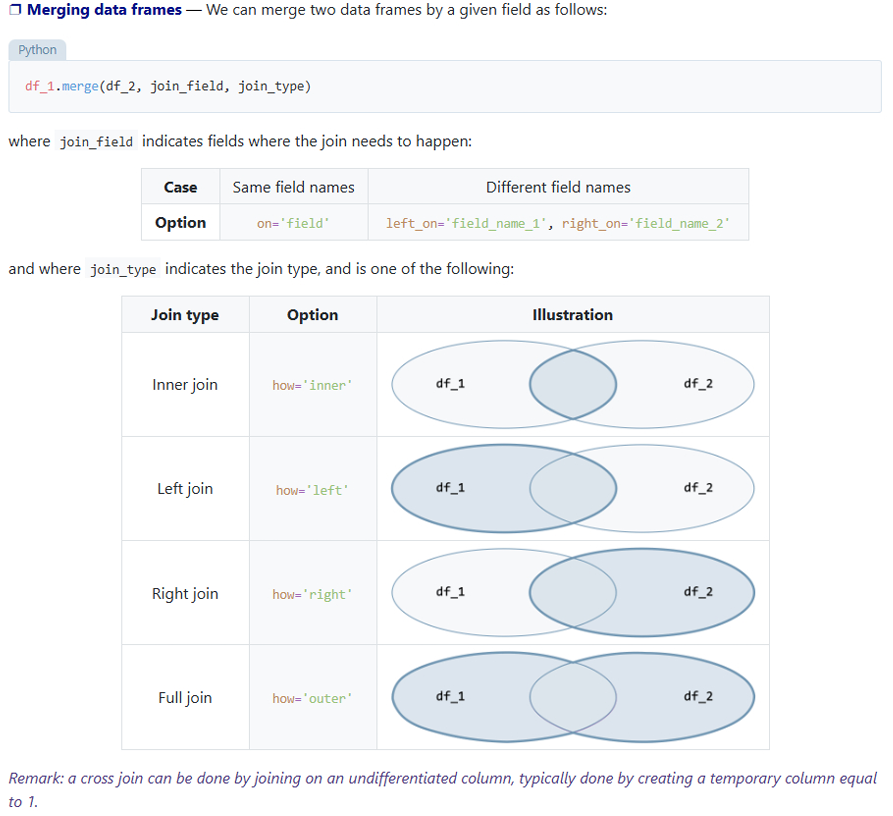

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [24]:
merged= pd.merge(df1,df2,on ="HPI")
merged

,HPI,Int_Rate_x,IND_GDP_x,Int_Rate_y,IND_GDP_y
0,80,2,50,2,15
1,90,1,45,1,45
2,70,2,45,2,45


<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
join
</div>

# 🔗 **Joining Two DataFrames** (Focus on Indexes)  

✅ **Joins align data based on indexes, not column values.**  
✅ **It works like a "union" operation on the index.**  

### 🔍 **Basic Syntax:**  
```python
result = df_x.join(df_y)  # Joins based on index
```

---

## 🔥 **Key Operations When Using `.join()`**  

### 🔹 **1️⃣ Print indexes that exist in `df_x` but not in `df_y`**  
```python
print(df_x.index.difference(df_y.index))  
```
**📌 This helps identify missing index values before joining.**  

### 🔹 **2️⃣ Sorting Index After Join**  
```python
result = df_x.join(df_y).sort_index()
```
**📌 Sorting ensures a structured & readable output after merging.**  

---

### 📌 **Example: Joining Two DataFrames**
```python
import pandas as pd

df_x = pd.DataFrame({"A": [10, 20, 30]}, index=["a", "b", "c"])
df_y = pd.DataFrame({"B": [100, 200]}, index=["b", "c"])

joined_df = df_x.join(df_y)  
print(joined_df)
```

### 🎯 **Output**
|    | A  | B   |  
|----|----|----|  
| a  | 10 | NaN |  
| b  | 20 | 100 |  
| c  | 30 | 200 |  

✨ **Explanation:**  
- The **join** is based on the index.  
- Missing values (`NaN`) appear where `df_y` lacks a corresponding index.  

🚀 **Master `.join()` to work efficiently with indexed data!**  

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [25]:
df1 = pd.DataFrame({"Int_Rate":[2,1,2,3], 
                    "IND_GDP":[50,45,45,67]},index=[2001, 2002,2003,2004])
df2 = pd.DataFrame({"low_tier_HPI":[50,45,67,34],
                    "unemployment":[1,3,5,6]},index=[2001, 2003,2004,2004])

print(df1)
print("============")
print(df2)

      Int_Rate  IND_GDP
2001         2       50
2002         1       45
2003         2       45
2004         3       67
      low_tier_HPI  unemployment
2001            50             1
2003            45             3
2004            67             5
2004            34             6


In [26]:
joined1= df1.join(df2)
joined1

,Int_Rate,IND_GDP,low_tier_HPI,unemployment
2001,2,50,50.0,1.0
2002,1,45,NaN,NaN
2003,2,45,45.0,3.0
2004,3,67,67.0,5.0
2004,3,67,34.0,6.0


In [27]:
joined2= df2.join(df1)
joined2    # 2002 not exist because it isn't in df2

,low_tier_HPI,unemployment,Int_Rate,IND_GDP
2001,50,1,2,50
2003,45,3,2,45
2004,67,5,3,67
2004,34,6,3,67


<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
Concatenation, stack ,  unstack
</div>

# 🔗 **Concatenation in Pandas**  

✅ **Combining multiple DataFrames along rows or columns effortlessly!**  
✅ **Think of it as "stacking" or "side-by-side merging."**  

---

## 🛠️ **Basic Syntax for Concatenation**  
```python
pd.concat([df1, df2])           # Default: (axis=0)
pd.concat([df1, df2], axis=1)   # Concatenates along columns
```

---

## 🎯 **Types of Concatenation**  

### 🔹 **1️⃣ Row-wise Concatenation (Vertical Stack)**
```python
result = pd.concat([df1, df2])
```
✨ **Adds rows from `df2` below `df1`.**  

### 🔹 **2️⃣ Column-wise Concatenation (Horizontal Stack)**
```python
result = pd.concat([df1, df2], axis=1)
```
✨ **Adds columns from `df2` next to `df1`.**  

### 🔹 **3️⃣ Ignoring Index During Concatenation**
```python
result = pd.concat([df1, df2], ignore_index=True)
```
✨ **Resets index instead of keeping original indexes.**  

### 🔹 **4️⃣ Using `keys` to Create a Hierarchical Index**
```python
result = pd.concat([df1, df2], keys=["Set1", "Set2"])
```
✨ **Helps track which DataFrame the data originated from.**  

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [28]:
df1 = pd.DataFrame({"Name":["ahmed","Mohamed","Mazen","Khaled"],
                    "Grade":[90,80,70,86]},index=[2009, 2002,2003,2004])
df1.index.name="ID"
print("Size >",df1.shape)
df1

Size > (4, 2)


,Name,Grade
ID,,
2009,ahmed,90
2002,Mohamed,80
2003,Mazen,70
2004,Khaled,86


In [29]:
df2 = pd.DataFrame({"Name":["mohamed","Mohsen","Mahmoud","ahmed"],
                    "Grade":[90,55,70,88]},index=[2005, 2006,2007,2008])
df2.index.name="ID"
print("Size >",df2.shape)
df2

Size > (4, 2)


,Name,Grade
ID,,
2005,mohamed,90
2006,Mohsen,55
2007,Mahmoud,70
2008,ahmed,88


In [30]:
# (axis=0)
concat1 = pd.concat([df1,df2])  
print("Size >",concat1.shape)
concat1

Size > (8, 2)


,Name,Grade
ID,,
2009,ahmed,90
2002,Mohamed,80
2003,Mazen,70
2004,Khaled,86
2005,mohamed,90
2006,Mohsen,55
2007,Mahmoud,70
2008,ahmed,88


In [31]:
# (axis=1)
concat2 = pd.concat([df1,df2],axis=1)
print("Size >",concat2.shape)
concat2

Size > (8, 4)


,Name,Grade,Name,Grade
ID,,,,
2009,ahmed,90.0,NaN,NaN
2002,Mohamed,80.0,NaN,NaN
2003,Mazen,70.0,NaN,NaN
2004,Khaled,86.0,NaN,NaN
2005,NaN,NaN,mohamed,90.0
2006,NaN,NaN,Mohsen,55.0
2007,NaN,NaN,Mahmoud,70.0
2008,NaN,NaN,ahmed,88.0


# 🔄 **Stack & Unstack in Pandas**  

## 📌 **1️⃣ Stack → Convert Columns into Rows**  
> **Think of it as "melting" the DataFrame!**  
> It moves the column labels into a single row index.  

### 🛠️ **Syntax**  
```python
df.stack()
```

---

## 📌 **2️⃣ Unstack → Convert Rows into Columns**  
> **The opposite of stack!**  
> It moves the row index back into column labels.  

### 🛠️ **Syntax**  
```python
df.unstack()
```
---

## 🔄 **When to Use?**  
✅ **`stack()`** → When you need a "longer" DataFrame (convert columns into rows).  
✅ **`unstack()`** → When you need a "wider" DataFrame (convert rows into columns).  

🚀 **These functions are powerful for reshaping data!**

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [32]:
concat1

,Name,Grade
ID,,
2009,ahmed,90
2002,Mohamed,80
2003,Mazen,70
2004,Khaled,86
2005,mohamed,90
2006,Mohsen,55
2007,Mahmoud,70
2008,ahmed,88


In [33]:
stacked = concat1.stack()
print("Size >",stacked.shape)
stacked

Size > (16,)


ID         
2009  Name       ahmed
      Grade         90
2002  Name     Mohamed
      Grade         80
2003  Name       Mazen
      Grade         70
2004  Name      Khaled
      Grade         86
2005  Name     mohamed
      Grade         90
2006  Name      Mohsen
      Grade         55
2007  Name     Mahmoud
      Grade         70
2008  Name       ahmed
      Grade         88
dtype: object

In [34]:
unstacked = stacked.unstack()
print("Size >",unstacked.shape)
unstacked

Size > (8, 2)


,Name,Grade
ID,,
2009,ahmed,90
2002,Mohamed,80
2003,Mazen,70
2004,Khaled,86
2005,mohamed,90
2006,Mohsen,55
2007,Mahmoud,70
2008,ahmed,88


<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
all vs any
</div>

# ✅ **`all()` & `any()` in Pandas**  

## 🔹 **1️⃣ `all()` → Checks if ALL values are `True`**  
```python
df.all(axis=0)  # Check all values in each column
df.all(axis=1)  # Check all values in each row
```
✔️ **Returns `True` if ALL values are `True`, otherwise `False`**  

---

## 🔹 **2️⃣ `any()` → Checks if ANY value is `True`**  
```python
df.any(axis=0)  # Check if any value in each column is `True`
df.any(axis=1)  # Check if any value in each row is `True`
```
✔️ **Returns `True` if AT LEAST ONE value is `True`, otherwise `False`**  

🚀 **Useful for filtering & conditional checks!**  

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [35]:
data = [[True, False, True], [True, True, True]]
df = pd.DataFrame(data)

print(df)
print("------")
print(df.all())
print("------")
print(df.any())

      0      1     2
0  True  False  True
1  True   True  True
------
0     True
1    False
2     True
dtype: bool
------
0    True
1    True
2    True
dtype: bool


<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
abs, add , add_prefix vs add_suffix
</div>

## 🔹 **1️⃣ `abs()` → Absolute values**  
✔️ Returns the absolute values of all numeric elements in a DataFrame or Series.  
```python
df.abs()
```
📌 **Example:**  
```python
import pandas as pd
df = pd.DataFrame({'A': [-5, -2, 3], 'B': [-1, 7, -8]})
print(df.abs())  
```
🔹 **Output:**  
```
   A  B
0  5  1
1  2  7
2  3  8
```

---

## 🔹 **2️⃣ `add()` → Element-wise addition**  
✔️ Adds a given value to each element.  
```python
df.add(10)   # Add 10 to all values
df['A'].add(df['B'])  # Column-wise addition
```
📌 **Example:**  
```python
df.add(5)  
```
🔹 **Output:**  
```
   A   B
0  0   4
1  3  12
2  8  -3
```

---

## 🔹 **3️⃣ `add_prefix()` vs `add_suffix()` → Rename columns or index**  

### 🟢 `add_prefix()`
✔️ Adds a prefix to column/index names.  
```python
df.add_prefix('col_')  
```
🔹 **Before:** `['A', 'B']`  
🔹 **After:** `['col_A', 'col_B']`  

### 🔵 `add_suffix()`
✔️ Adds a suffix to column/index names.  
```python
df.add_suffix('_data')  
```
🔹 **Before:** `['A', 'B']`  
🔹 **After:** `['A_data', 'B_data']`  

📌 **Example:**
```python
df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df_prefixed = df.add_prefix("col_")
df_suffixed = df.add_suffix("_data")
print(df_prefixed)
print(df_suffixed)
```
🔹 **Output:**  
```
   col_A  col_B
0      1      3
1      2      4
```
```
   A_data  B_data
0       1       3
1       2       4
```

🚀 **Use `add_prefix()` and `add_suffix()` when renaming columns dynamically!**  

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [36]:
data = [[-50, 40, 30], [-1, 2, -2]]
df = pd.DataFrame(data)

print(df)
print("------")
print(df.abs())

    0   1   2
0 -50  40  30
1  -1   2  -2
------
    0   1   2
0  50  40  30
1   1   2   2


In [37]:
data = {
    "points": [100, 120, 114],
    "total": [350, 340, 402]
}

df = pd.DataFrame(data)

print(df)
print("------")
print(df.add(15))

   points  total
0     100    350
1     120    340
2     114    402
------
   points  total
0     115    365
1     135    355
2     129    417


In [38]:
data = {
    "age": [50, 40, 30, 40, 20, 10, 30],
    "qualified": [True, False, False, False, False, True, True]
}
df = pd.DataFrame(data)
df

,age,qualified
0,50,True
1,40,False
2,30,False
3,40,False
4,20,False
5,10,True
6,30,True


In [39]:
newdf = df.add_prefix("person_")
newdf

,person_age,person_qualified
0,50,True
1,40,False
2,30,False
3,40,False
4,20,False
5,10,True
6,30,True


In [40]:
data = {
    "age": [50, 40, 30, 40, 20, 10, 30],
    "qualified": [True, False, False, False, False, True, True]
}

df = pd.DataFrame(data)
df

,age,qualified
0,50,True
1,40,False
2,30,False
3,40,False
4,20,False
5,10,True
6,30,True


In [41]:
newdf = df.add_suffix("_after")
newdf

,age_after,qualified_after
0,50,True
1,40,False
2,30,False
3,40,False
4,20,False
5,10,True
6,30,True


<h1 align="center"><strong></strong></h1>
<div style="background-color:rgb(255, 255, 255) ; color:rgb(46, 40, 40); width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">
agg or aggregate
</div>

### 🎯 Apply multiple aggregation functions on a DataFrame or Series

## 🔹 **1️⃣ Basic Usage**  
✔️ `agg()` allows applying multiple functions to columns.  
```python
df.agg(['sum', 'mean', 'max'])          # Apply functions to all numeric columns  
df['column_name'].agg(['min', 'std'])   # Apply functions to a single column
```

---

## 🔹 **2️⃣ Custom Aggregation on Specific Columns**  
✔️ You can apply different functions to different columns using a dictionary.  
```python
df.agg({'A': ['sum', 'min'], 'B': ['mean', 'max']})
```

📌 **Example:**  
```python
import pandas as pd  
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})  
result = df.agg({'A': ['sum', 'min'], 'B': ['mean', 'max']})  
print(result)
```
🔹 **Output:**  
```
       A    B
sum    6  NaN
min    1  NaN
mean NaN  5.0
max  NaN  6.0
```

---

## 🔹 **3️⃣ Applying Custom Functions**  
✔️ Pass a lambda function inside `agg()`.  
```python
df.agg(lambda x: x.max() - x.min())
```

📌 **Example:**  
```python
df.agg({'A': lambda x: x.max() - x.min(), 'B': ['sum']})
```
🔹 **Output:**  
```
A    2
B   15
```

🚀 **`agg()` is powerful for flexible and efficient aggregation!**

<div style="width: 100%; height: 10px; background: linear-gradient(to right, orange, red, orange, red, orange); border-radius: 5px; margin: 20px 0;"></div>

In [42]:
data = {
    "x": [50, 40, 30],
    "y": [300, 1112, 42]
}

df = pd.DataFrame(data)
df

,x,y
0,50,300
1,40,1112
2,30,42


In [43]:
x = df.agg(["sum"])
x

,x,y
sum,120,1454


In [44]:
y = df.aggregate(["sum"])
y

,x,y
sum,120,1454


# 📊 **Pandas Aggregation Functions**

| **Aggregation**      | **Description**                            |
|----------------------|--------------------------------------------|
| `count()`           | Total number of items                     |
| `first()`, `last()` | First and last item                       |
| `mean()`, `median()`| Mean and median                           |
| `min()`, `max()`    | Minimum and maximum                       |
| `std()`, `var()`    | Standard deviation and variance           |
| `mad()`            | Mean absolute deviation                   |
| `prod()`           | Product of all items                      |
| `sum()`            | Sum of all items                          |